In [1]:
## Deconvolution into discrete subpopulations using a general mixture model (GMM)

## Imports and variables

import numpy as np
import glob
import os
from pathlib import Path
import sys 

# Path hidpy
sys.path.append('%s/../' % os.getcwd())

from deconvolution import applyGMM_functions
from deconvolution import applyGMMconstrained_fitout_functions
from deconvolution import importDeconvolutionGMM

from tqdm import tqdm

BayesMat={} # Dictionary with all the Bayes struct per cell
numDist = 1 # Choose maximum number of distributions


pathBayesCells='%s/../output-paper/u2os-h2bgfp-serum-1/100_ex/' % os.getcwd()
parameters2decon=['D','A','V']
nbins=50

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


100%|██████████| 1/1 [00:00<00:00, 55.08it/s]

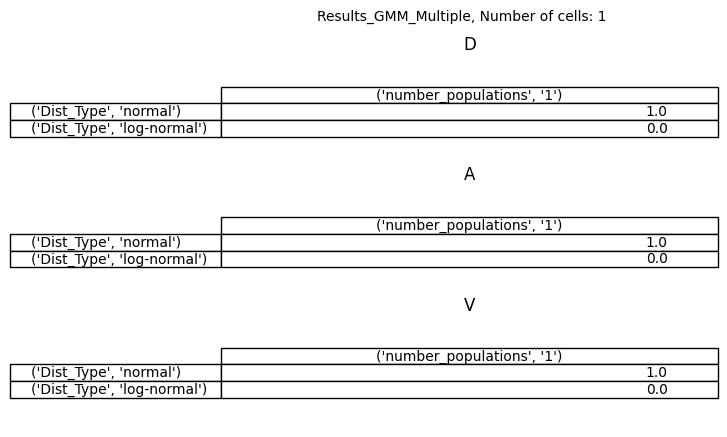

In [2]:
## Deconvolution GMM

listdir=glob.glob(pathBayesCells+'*.pickle')  # Read cell pickle files

BayesMat=importDeconvolutionGMM.applyGMM_Multiple(listdir,parameters2decon,numDist) # Apply GMM

pathBayesCells_GMM_Multiple=pathBayesCells+'/GMM_Multiple/'

try: 
    os.mkdir(pathBayesCells_GMM_Multiple)
except: 
    print('WARNING: The output path [%s] exists' %pathBayesCells_GMM_Multiple)
    [f.unlink() for f in Path(pathBayesCells_GMM_Multiple).glob("*") if f.is_file()] 

importDeconvolutionGMM.generatetable_TestGMM(pathBayesCells_GMM_Multiple,BayesMat,parameters2decon) # Make Table

100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


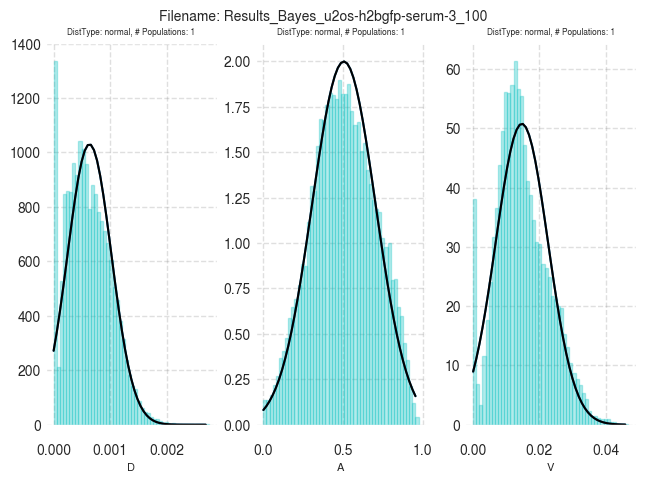

In [3]:
# Generating plots for inspection
showplots=True

pathBayesCells_Plots=pathBayesCells_GMM_Multiple+'Plots_GMM_Multiple/'

try: 
    os.mkdir(pathBayesCells_Plots)
except: 
    print('WARNING: The output path [%s] exists' %pathBayesCells_Plots)
    [f.unlink() for f in Path(pathBayesCells_Plots).glob("*") if f.is_file()] 


importDeconvolutionGMM.generateplots_TestGMM(pathBayesCells_Plots, BayesMat, parameters2decon, nbins, showplots)

In [4]:
# Run GMM based on table and plots for each parameter [D A V]

Sel_DistributionType=['lognormal','normal','lognormal']
Sel_numDist=[3,2,3]

BayesMatSel=importDeconvolutionGMM.applyGMMconstrained_dir(listdir,parameters2decon,Sel_DistributionType,Sel_numDist)


100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


Verify Package!


100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


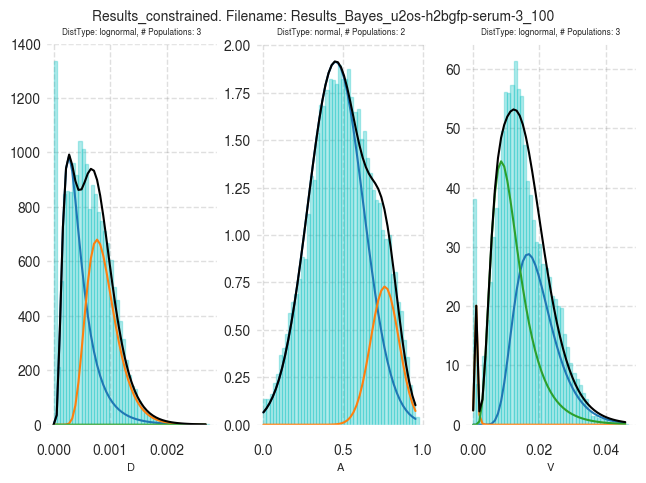

In [6]:
# Generate plots GMM constrained

pathGMMConstrained=pathBayesCells+'/GMM_Constrained/'
try: 
    os.mkdir(pathGMMConstrained)
except: 
    print('WARNING: The output path [%s] exists' %pathGMMConstrained)
    [f.unlink() for f in Path(pathGMMConstrained).glob("*") if f.is_file()]

pathBayesCells_Plots_constrained=pathGMMConstrained+'/Plots_GMM_Constrained/'
showplots=True
try: 
    os.mkdir(pathBayesCells_Plots_constrained)
except: 
    print('WARNING: The output path [%s] exists' %pathBayesCells_Plots_constrained)
    [f.unlink() for f in Path(pathBayesCells_Plots_constrained).glob("*") if f.is_file()]


importDeconvolutionGMM.generateplots_GMMconstrained_fitout(pathBayesCells_Plots_constrained,BayesMatSel,parameters2decon,nbins,Sel_DistributionType,Sel_numDist,showplots)


  0%|          | 0/1 [00:00<?, ?it/s]

Verify Package!
Verify Package!
Verify Package!


100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


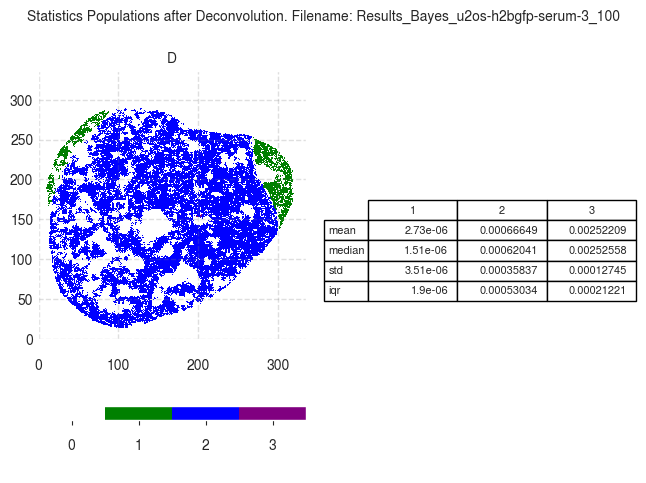

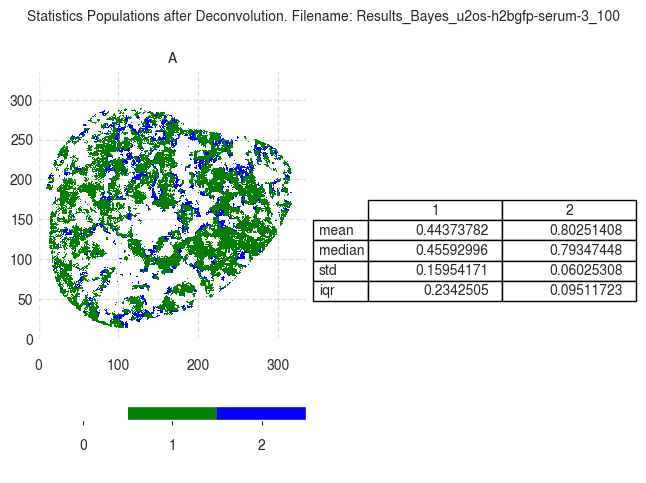

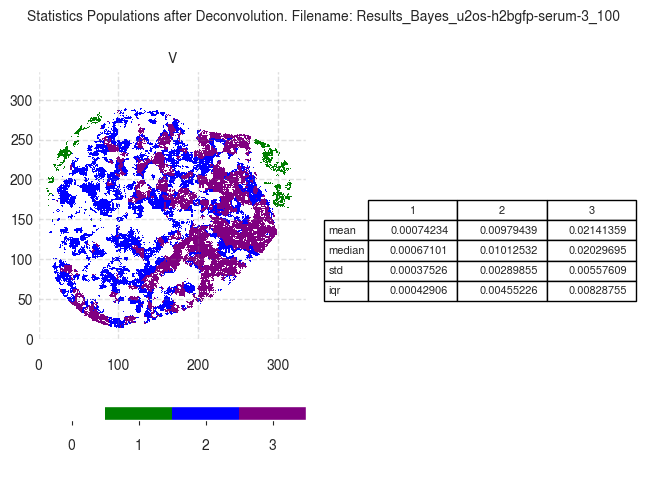

In [7]:
# Generate spatial mapping of population deconvolution

pathBayesCells_Populations_Plots=pathGMMConstrained+'/Populations_Plots_Stats/'
try: 
    os.mkdir(pathBayesCells_Populations_Plots)
except: 
    print('WARNING: The output path [%s] exists' %pathBayesCells_Populations_Plots)
    [f.unlink() for f in Path(pathBayesCells_Populations_Plots).glob("*") if f.is_file()]
    

showplots=True


for i in tqdm(range(len(BayesMatSel))):
    for j in range(len(parameters2decon)):
        try: 
            importDeconvolutionGMM.generate_plots_stats_decon(BayesMatSel[i],parameters2decon[j],pathBayesCells_Populations_Plots,showplots)
        except:
            filename_without_ext = os.path.splitext(BayesMatSel[i]['filename'])[0]
            print('WARNING: Error generating population label plot: File: '+filename_without_ext+' Parameter: '+parameters2decon[j])
